## Baseline checks

Just checking everything works as it should

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

centralized_training_loss = "../bin/baseline-pytorch/outputs/centralized_outputs/loss_per_epoch.csv"

### The model we have is actually learning 

Text(0.5, 1.0, 'Centralized Training Loss')

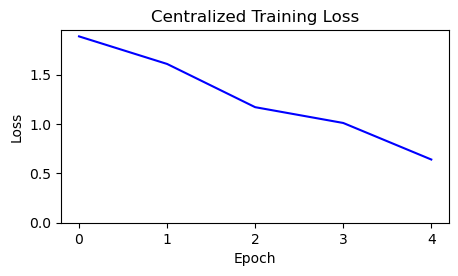

In [ ]:
# read in the csv file
df_centralized_training_loss = pd.read_csv(centralized_training_loss)
#plot the training loss
plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['loss'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Centralized Training Loss')


In [35]:
# Test set accuracy
centralized_test_accuracy = "../bin/baseline-pytorch/outputs/centralized_outputs/test_loss_accuracy.csv"
# read in the csv file
df_centralized_test_accuracy = pd.read_csv(centralized_test_accuracy)
df_centralized_test_accuracy

,loss,accuracy
0,0.754746,0.71022


In [27]:
# Now load the federated learning loss
import json
federated_training_loss = "../bin/baseline-pytorch/outputs/federated_outputs/results.json"
with open(federated_training_loss, 'r') as f:
    data = json.load(f)

# Plot centralized evaluate
df_centralized_evaluate = pd.DataFrame(data['centralized_evaluate'])
df_federated_evaluate = pd.DataFrame(data['federated_evaluate'])




In [31]:
df_centralized_evaluate


,round,centralized_loss,centralized_accuracy
0,0,2.294257,0.0643
1,1,2.337441,0.1000
2,2,2.337922,0.1000
3,3,2.339380,0.1000


In [23]:
df_centralized_training_loss

,epoch,loss
0,0,1.985198
1,1,1.261494
2,2,1.389305
3,3,0.872073
4,4,1.265454


In [42]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions


fds = FederatedDataset(
    dataset="cifar10",
    partitioners={
        "train": DirichletPartitioner(
            num_partitions=10,
            partition_by="label",
            alpha=1,
            seed=42,
            min_partition_size=0,
        ),
    },
)

partitioner = fds.partitioners["train"]

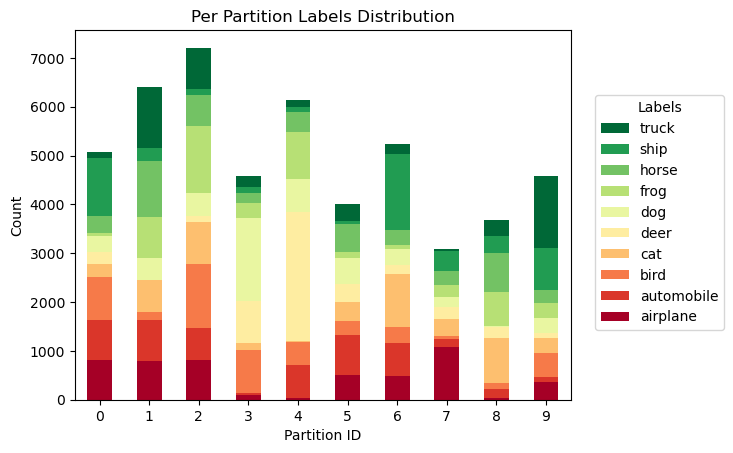

In [43]:
fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="label",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution",
)